# Coding 3 - Data Management and Analysis with Python : Final Project

- Sári Vargha
- Ali Sial
- Ghazal Ayobi

The goal of this project is to answer the following questions:

- Runtime Analysis : how movies runtime has changed across decades?
- Revenue Analysis : 
- Text analysis


## Project Overview
To initiate our project, we downloaded a movies dataset from Kaggle which can be found [here](https://www.kaggle.com/datasets/omkarborikar/top-10000-popular-movies). This dataset contains information about movies _id, langugage, title, popularity, release date, average vote, total votes, genres, overview, runtime, and tagline_ For the mentioned analytical questions we require to enrich our data. Thus, in the first step we are using The movies database (TMDB) API to get information about budget on each movie. In our dataset we do not have movies IMDB id. Thus, we also use TMDB API to request IMDB id. For further analysis and to answer our analytical questions we require to have movies age rating. Thus, we used age rating API to request for movies age rating. 



Our project is divided into the following steps: First we load packages, then we read and inspect our dataset, after this we cleaned the dataset. After this cleaning by using the mentioned APIs we enrich our data. As a final respect we answer our analytical questions and provide conclusion

Movies dataset contains 10000 rows and 13 columns, we dropped duplicates and null values from id. During the data exploration phase we looked at percentage of null in each column.

#### Loading packages

In [156]:
import requests # to make TMDB API calls
import os
import json
import re
import seaborn as sns
#!pip install plotly
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import pandas as pd
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis

api_key = "e322a1b56a7b82d58ef9c940176f5907" # get TMDB API key from config.py file

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Data source : https://www.kaggle.com/datasets/omkarborikar/top-10000-popular-movies

In [158]:
os.getcwd() # checking the directory
os.listdir() # listing the items in the directory
# Make sure the movies data is in the directory

data = pd.read_csv("https://raw.githubusercontent.com/ghazalayobi/coding3/main/movies.csv", encoding='utf8', engine='python')


In [159]:
data.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [160]:
# inspecting the movies data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10014 non-null  object 
 1   id                 10002 non-null  float64
 2   original_language  10002 non-null  object 
 3   original_title     10001 non-null  object 
 4   popularity         10000 non-null  float64
 5   release_date       9962 non-null   object 
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  float64
 8   genre              10000 non-null  object 
 9   overview           9900 non-null   object 
 10  revenue            9998 non-null   float64
 11  runtime            9989 non-null   float64
 12  tagline            7079 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1017.2+ KB


In [ ]:
data.shape

In [ ]:
# removing duplicates
data = data.drop_duplicates(subset=['id'])

In [ ]:
# describe data
data.describe().T

In [ ]:
#look for missing data
for col in data.columns:
    percent_missing = data[col].isnull().mean()
    print("{} - {}%".format(col, percent_missing))

#### Exploring data

In [ ]:

x1 = data['runtime'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#006d7e"])

fig.update_layout(title_text='Runtime Distribution', plot_bgcolor = 'rgba(0, 0, 0, 0)',
paper_bgcolor =  'rgba(0, 0, 0, 0)')



In [ ]:

fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Runtime vs Vote Average", "Runtime vs Vote Count"))
fig.add_trace(go.Scatter(x= data['vote_average'], y = data["runtime"], 
                         mode='markers', name='Runtime vs Vote Average'), row=1, col=1).update_traces(marker=dict(color="#006d7e"))
fig.add_trace(go.Scatter(x= data['vote_count'], y = data["runtime"],
                         mode='markers', name='Runtime vs Vote Count'), row=1, col=2).update_traces(marker=dict(color="#006d7e"))


fig.update_layout(title_text='Runtime vs Vote average', autosize=False, width=1200, height=600, plot_bgcolor = 'rgba(0, 0, 0, 0)',
paper_bgcolor =  'rgba(0, 0, 0, 0)')
# update xaxis
fig.update_xaxes(title_text="Vote Average", row=1, col=1)
fig.update_xaxes(title_text="Vote Count", row=1, col=2)

# update yaxis 
fig.update_yaxes(title_text="Runtime", row=1, col=1)
fig.update_yaxes(title_text="runtime", row=2, col=1)

fig.update_layout(title="Movies Runtime")
fig.show()

In [ ]:

fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Revenue vs Vote Average", "Revenue vs Vote Count"))
fig.add_trace(go.Scatter(x= data['vote_average'], y = data["revenue"], 
                         mode='markers', name="Revenue vs Vote Average"), row=1, col=1).update_traces(marker=dict(color="#006d7e"))
fig.add_trace(go.Scatter(x= data['vote_count'], y = data["revenue"],
                         mode='markers', name='Revenue vs Vote Count'), row=1, col=2).update_traces(marker=dict(color="#006d7e"))


fig.update_layout(title_text='Revenue vs Vote average', autosize=False, width=1200, height=600, plot_bgcolor = 'rgba(0, 0, 0, 0)',
paper_bgcolor =  'rgba(0, 0, 0, 0)')
# update xaxis
fig.update_xaxes(title_text="Vote Average", row=1, col=1)
fig.update_xaxes(title_text="Vote Count", row=1, col=2)

# update yaxis 
fig.update_yaxes(title_text="Revenue", row=1, col=1)
fig.update_yaxes(title_text="Revenue", row=2, col=1)

fig.update_layout(title="Movies Revenue")
fig.show()

At the end of the reading and data inspection task we added data exploration part. In this part we checked the distribution of runtime, correlation for runtime and vote average, runtime, and vote count. Moreover, we also checked correlation between revenue and vote average, revenue, and vote count. We can see that vote count and runtime has positive relationship.

## Task 2: Cleaning Data

-  ### Subtask 2.1: cleaning data

In the cleaning data section, we checked the number of missing values in each column, we see that tagline has the highest number of missing values. We dropped the null values from id, and changed date column to the year, month and day format.

In [ ]:
data.isnull().sum(axis=0).sort_values(ascending=False)

In [ ]:
# remove zero and blank values in the id column 
data = data[data.id != 0]
data = data[data.revenue != 0]


# keep unique values in the id column and remove NaN values
data = data.dropna(subset=['id'])

# change to numeric
data["id"] = pd.to_numeric(data["id"])


In [ ]:
data['release_date'] = pd.to_datetime(data['release_date'],format='%Y-%m-%d')
# plotting the id column
plt.figure(figsize=(18,7)) # Make it 18x7 inch
plt.grid(False)
plt.hist(data['release_date'], bins=90, facecolor = '#006d7e', edgecolor='#169acf', linewidth=0.5)
plt.title('Date Distribution') 
plt.xlabel('Bins') 
plt.ylabel('Values') 
plt.show()

In [ ]:
data["year"] = data["release_date"].dt.year 
data["month"] = data["release_date"].dt.month
data["weekday"] = data["release_date"].dt.day_name()


In [ ]:
fig, axarr = plt.subplots(2, 1, figsize=(18, 8))

ax1 = data['month'].value_counts().sort_index().plot.bar(color = '#006d7e',
    ax=axarr[0]
)

ax2 = data['weekday'].value_counts().head(20).plot.bar(color = '#006d7e',
    ax=axarr[1]
)

plt.xticks(rotation=0)
ax1.title.set_text('Movies released per Month')
ax2.title.set_text('Movies released per Week')

In the above section we can see that number of movies has gradually increasing since 1920. As shown above there are many movies released in september and december. Moreover, we can see that there are many movies released on Friday.

## Task 3: Enriching the Data

we need more information in order to answer our main questions. For this purpose we are using TMDB (The movie database) API. We expect to get information on movies _Budget_, and _Production Countries_. Below is the data available on the movies in TMDB. 

In [ ]:
# to get list of all keys
list(requests.get('https://api.themoviedb.org/3/movie/311667.0?api_key=e322a1b56a7b82d58ef9c940176f5907').json())

-  ### Subtask 3.1: calling TMDB API

In [ ]:
# Sicne it takes long time to extract data from, therefore, we have saved the extracted data in a csv file that is saved in the directory. Please load that file to continue.  
#budget_data = []

#for i in data['id']:
#    rr = requests.get('https://api.themoviedb.org/3/movie/{}?api_key=e322a1b56a7b82d58ef9c940176f5907'.format(i))
#   rr_data=rr.json()['budget']
 #   budget_data.append(rr_data)
    
#len(budget_data)

In [ ]:
# Sicne it takes long time to extract data from, therefore, we have saved the extracted data in a csv file that is saved in the directory. Please load that file to continue.  

#imdb_id = []

#for i in data['id']:
#    rr = requests.get('https://api.themoviedb.org/3/movie/{}?api_key=e322a1b56a7b82d58ef9c940176f5907'.format(i))
#    rr_data=rr.json()['imdb_id']
#    imdb_id.append(rr_data)
    
#len(imdb_id)

In [ ]:
# changing budget data to a data frame and saving in to csv, which can be found in the directory 
#budget_data = pd.DataFrame (budget_data, columns = ['budget'])
#imdb_id = pd.DataFrame (imdb_id, columns = ['imdb_id'])

# for faster access we write the data from API to a csv file and open it to speed up the work.
#budget_data.to_csv("budget_data.csv", index = False)
#imdb_id.to_csv("imdb_id.csv", index = False)



In [161]:
# reading the csv files for budget and id data
budget_data = pd.read_csv('https://raw.githubusercontent.com/ghazalayobi/coding3/main/budget_data.csv', encoding='utf8', engine='python')
imdb_id = pd.read_csv('https://raw.githubusercontent.com/ghazalayobi/coding3/main/imdb_id.csv', encoding='utf8', engine='python')


# combining budget with main dataset 
df_combined = pd.concat([data.reset_index(drop=True), budget_data], axis=1)
df_combined = pd.concat([df_combined.reset_index(drop=True), imdb_id], axis=1)

df_combined['profit'] = df_combined['revenue'] - df_combined['budget']

-  ### Subtask 3.2: calling age rating API

In [ ]:
# Sicne it takes long time to extract data from, therefore, we have saved the extracted data in a csv file that is saved in the directory. Please load that file to continue.  

#movie_rating = []

#for i in df_combined['imdb_id']:
#    rr = requests.get('https://age-ratings.com/api2/s/{}/de'.format(i))
#    rr_data=rr.json()
#    movie_rating.append(rr_data)
    


In [ ]:
# saving and writing the data
#movie_rating = pd.DataFrame (movie_rating, columns = ['movie_rating'])
#movie_rating.to_csv("movie_rating.csv", index = False)


In [162]:

movie_rating = pd.read_csv('https://raw.githubusercontent.com/ghazalayobi/coding3/main/movie_rating.csv', encoding='utf8', engine='python')

df_combined = pd.concat([df_combined.reset_index(drop=True), movie_rating], axis=1)

Movie rating is in german rating we can change is to US rating 
https://age-ratings.com/api_desc.html
changing german rating to US ranting

In [ ]:
df_combined['us_rating'] = df_combined['movie_rating']
df_combined.loc[df_combined["us_rating"] == 0, "us_rating"] = 'R'
df_combined.loc[df_combined["us_rating"] == 6, "us_rating"] = 'PG-13'
df_combined.loc[df_combined["us_rating"] == 12, "us_rating"] = 'PG'
df_combined.loc[df_combined["us_rating"] == 16, "us_rating"] = 'G'
df_combined.loc[df_combined["us_rating"] == 18, "us_rating"] = '18+'
df_combined.loc[df_combined["us_rating"] == 100, "us_rating"] = 'NaN'
df_combined.loc[df_combined["us_rating"] == 300, "us_rating"] = 'NaN'

In [ ]:
df_combined.loc[df_combined["original_language"] == "en", "original_language"] = 'English'
df_combined.loc[df_combined["original_language"] == "zh", "original_language"] = 'Chinese'
df_combined.loc[df_combined["original_language"] == "ja", "original_language"] = 'Japanese'
df_combined.loc[df_combined["original_language"] == "fr", "original_language"] = 'French'
df_combined.loc[df_combined["original_language"] == "te", "original_language"] = 'Tegulu'
df_combined.loc[df_combined["original_language"] == "ko", "original_language"] = 'Korean'
df_combined.loc[df_combined["original_language"] == "it", "original_language"] = 'Italian'
df_combined.loc[df_combined["original_language"] == "cn", "original_language"] = 'Chinese'
df_combined.loc[df_combined["original_language"] == "hi", "original_language"] = 'Hindi'
df_combined.loc[df_combined["original_language"] == "sv", "original_language"] = 'Swedish'
df_combined.loc[df_combined["original_language"] == "es", "original_language"] = 'Spanish'
df_combined.loc[df_combined["original_language"] == "de", "original_language"] = 'German'
df_combined.loc[df_combined["original_language"] == "ar", "original_language"] = 'Arabic'
df_combined.loc[df_combined["original_language"] == "pt", "original_language"] = 'Portuguese'
df_combined.loc[df_combined["original_language"] == "ru", "original_language"] = 'Russian'
df_combined.loc[df_combined["original_language"] == "th", "original_language"] = 'Thai'
df_combined.loc[df_combined["original_language"] == "nl", "original_language"] = 'Dutch'
df_combined.loc[df_combined["original_language"] == "fa", "original_language"] = 'Persian'
df_combined.loc[df_combined["original_language"] == "tr", "original_language"] = 'Turkish'
df_combined.loc[df_combined["original_language"] == "no", "original_language"] = 'Norwegian'
df_combined.loc[df_combined["original_language"] == "pl", "original_language"] = 'Polish'
df_combined.loc[df_combined["original_language"] == "da", "original_language"] = 'Danish'
df_combined.loc[df_combined["original_language"] == "cs", "original_language"] = 'Czech'
df_combined.loc[df_combined["original_language"] == "id", "original_language"] = 'Indonesian'
df_combined.loc[df_combined["original_language"] == "nb", "original_language"] = 'Norwegian'
df_combined.loc[df_combined["original_language"] == "uk", "original_language"] = 'Ukrainian'
df_combined.loc[df_combined["original_language"] == "la", "original_language"] = 'Latin'
df_combined.loc[df_combined["original_language"] == "fi", "original_language"] = 'Finnish'
df_combined.loc[df_combined["original_language"] == "hu", "original_language"] = 'Hungarian'

-  ### Subtask 3.3: Adding binaries for genres

In [ ]:
df_combined.loc[df_combined['genre'].str.contains('Action'), 'action'] = 1
df_combined.loc[df_combined['genre'].str.contains('Adventure'), 'adventure'] = 1
df_combined.loc[df_combined['genre'].str.contains('Animation'), 'animation'] = 1
df_combined.loc[df_combined['genre'].str.contains('Comedy'), 'comedy'] = 1
df_combined.loc[df_combined['genre'].str.contains('Crime'), 'crime'] = 1
df_combined.loc[df_combined['genre'].str.contains('Drama'), 'drama'] = 1
df_combined.loc[df_combined['genre'].str.contains('Family'), 'family'] = 1
df_combined.loc[df_combined['genre'].str.contains('Fantasy'), 'fantasy'] = 1
df_combined.loc[df_combined['genre'].str.contains('History'), 'history'] = 1
df_combined.loc[df_combined['genre'].str.contains('Horror'), 'horror'] = 1
df_combined.loc[df_combined['genre'].str.contains('Music'), 'music'] = 1
df_combined.loc[df_combined['genre'].str.contains('Mystery'), 'mystery'] = 1
df_combined.loc[df_combined['genre'].str.contains('Romance'), 'romance'] = 1
df_combined.loc[df_combined['genre'].str.contains('Science Fiction'), 'sci-fi'] = 1
df_combined.loc[df_combined['genre'].str.contains('TV Movie'), 'tv_movie'] = 1
df_combined.loc[df_combined['genre'].str.contains('Thriller'), 'thriller'] = 1
df_combined.loc[df_combined['genre'].str.contains('War'), 'war'] = 1
df_combined.loc[df_combined['genre'].str.contains('Western'), 'western'] = 1

In [ ]:
df_combined.update(df_combined[['action','adventure','animation', 
                                'comedy', 'crime', 'drama', 'family', 
                                'fantasy', 'history', 'horror', 'music', 
                                'mystery', 'romance', 'sci-fi', 
                                'tv_movie', 'thriller', 'war', 'western']].fillna(0))

In [ ]:
df_combined['genre'] = df_combined['genre'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df_combined['genre'] = df_combined['genre'].str.split(',')

Below you can see the chart highlighting number of movies by genre and we can observe that the Top 4 genres are 'Drama', 'Comedy', 'Thriller' and 'Actions'. Later these we focued on these 4 genres to answers one of the analytical question we plan to answer using this data. 

In [ ]:
# visualizing all genres in the main datase
plt.subplots(figsize=(13,11))
list1 = []
for i in df_combined['genre']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('viridis',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [ ]:
# writing the csv for easier access
#df_combined.to_csv("movies_final.csv", index = False)

## Task 4: Data Analysis
-  ### Subtask 4.1: Runtime Analysis

In this section we are aiming to evaluate how the run time has changed across different decades? 
Moreover, we will also examine movies run time across different film ratings and genres

We saved our final data set which contains data cleaning process and the data extracted from APIs to the movies final.  Calling API consumers longer time, in order to save time we will be working on cleaned data.

In the first step we change the release time the correct date and time format. We can see that  our dataset contains information about the movies from 1920 to 2021. Moreover, we create a new column for decades. Then we plot the decades using box plots. 
Box plots are better choice for this purpose as it shows the out-layers and averages.

In [163]:
# reading the final csv file
movies = pd.read_csv('https://raw.githubusercontent.com/ghazalayobi/coding3/main/movies_final.csv', encoding='utf8', engine='python')

In [4]:
movies.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,...,history,horror,music,mystery,romance,sci-fi,tv_movie,thriller,war,western
0,0,580489.0,English,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['ScienceFiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,524434.0,English,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'ScienceFiction', 'Fan...",The Eternals are a team of ancient aliens who ...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,438631.0,English,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'ScienceFiction']","Paul Atreides, a brilliant and gifted young ma...",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,550988.0,English,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'ScienceFict...",A bank teller called Guy realizes he is a back...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,574060.0,English,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347.0,"['Action', 'Thriller', 'Crime']",In her turbulent life as a professional assass...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d')
movies["release_year"] = pd.DatetimeIndex(movies['release_date']).year
min(movies["release_year"])

1920

In [6]:
max(movies["release_year"])

2021

In [7]:
# create column for decades
movies["decade"] =""
movies.loc[movies["release_year"] < 1980 , "decade"] = '1970s'
movies.loc[(movies["release_year"] >= 1980) & (movies["release_year"] < 1990), "decade"] = '1980s'
movies.loc[(movies["release_year"] >= 1990) & (movies["release_year"] < 2000), "decade"] = '1990s'
movies.loc[(movies["release_year"] >= 2000) & (movies["release_year"] < 2010), "decade"] = '2000s'
movies.loc[(movies["release_year"] >= 2010) & (movies["release_year"] < 2020), "decade"] = '2010s'
movies.loc[(movies["release_year"] >= 2020), "decade"] = '2020s'

In [8]:
movies.sort_values(by="release_year", ascending = False).head()


,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,...,music,mystery,romance,sci-fi,tv_movie,thriller,war,western,release_year,decade
0,0,580489.0,English,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['ScienceFiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2021,2020s
2192,3488,615643.0,English,Minari,26.165,2021-02-12,7.4,875.0,['Drama'],A Korean-American family moves to Arkansas in ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,2020s
2717,4304,696822.0,English,Bloody Hell,16.082,2021-01-14,6.4,72.0,"['Horror', 'Comedy']",A man with a mysterious past flees the country...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,2020s
1,1,524434.0,English,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'ScienceFiction', 'Fan...",The Eternals are a team of ancient aliens who ...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2021,2020s
510,846,522406.0,English,Flashback,73.703,2021-06-03,6.5,144.0,['Thriller'],Frederick Fitzell is living his best life—unti...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021,2020s


In the section below we have seen that movies runtime on average has decreased. The above boxplot shows that out layers of data as we move to the recent decades gets decreased. The average runtime of movies is also decreasing.  
We can see form the subplots of runtime for the best genres that runtime for drama on average has decreased, however there is a steady runtime average for comedy movies and action movies. In addition, many fluctuations can be seen in the thriller genre.

Text(0.5, 1.0, 'Runtime by decade')

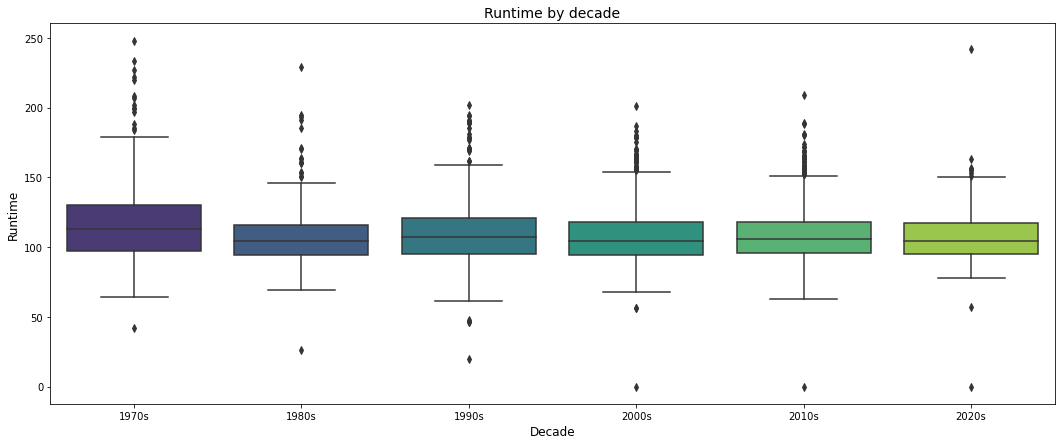

In [9]:
plt.subplots(figsize=(18,7))
ax = sns.boxplot(x="decade", 
                 y="runtime", 
                 data=movies, 
                 palette = "viridis", 
                 order = ["1970s", "1980s", "1990s", "2000s", "2010s", "2020s"])
plt.ylabel("Runtime", size=12)
plt.xlabel("Decade", size=12)
plt.title("Runtime by decade", size=14)


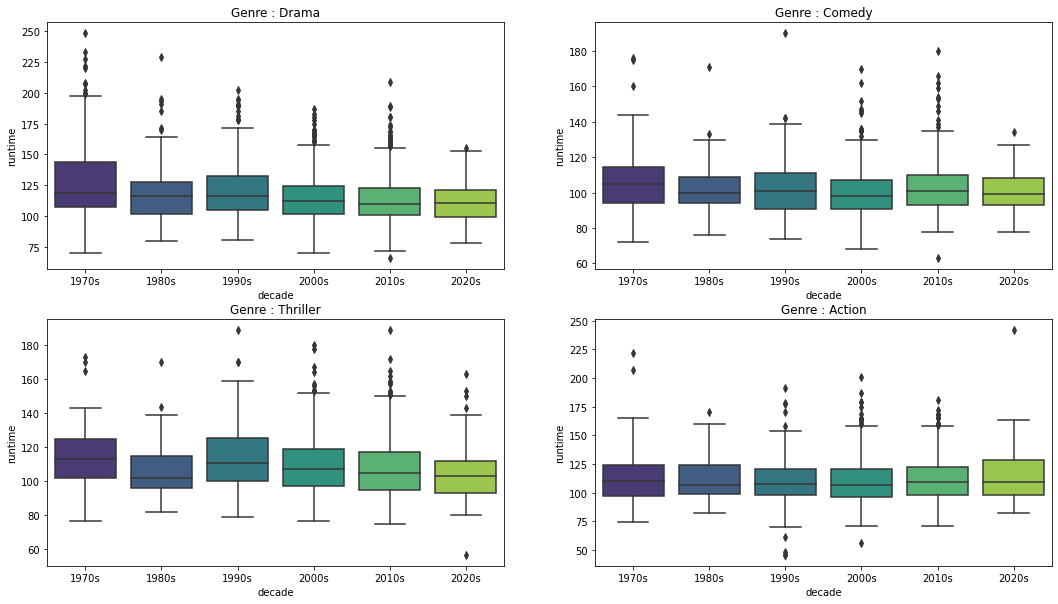

In [10]:
fig, axes = plt.subplots(2,2, figsize = (18, 10))

sns.boxplot(ax=axes[0, 0], data=movies[movies['drama']==1], x='decade', y='runtime', palette = "viridis", 
                 order = ["1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]).title.set_text('Genre : Drama')
sns.boxplot(ax=axes[0, 1], data=movies[movies['comedy']==1], x='decade', y='runtime', palette = "viridis", 
                 order = ["1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]).title.set_text('Genre : Comedy')
sns.boxplot(ax=axes[1, 0], data=movies[movies['thriller']==1], x='decade', y='runtime', palette = "viridis", 
                 order = ["1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]).title.set_text('Genre : Thriller')
sns.boxplot(ax=axes[1, 1], data=movies[movies['action']==1], x='decade', y='runtime', palette = "viridis", 
                 order = ["1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]).title.set_text('Genre : Action')

Text(0.5, 1.0, 'Runtime by target audience')

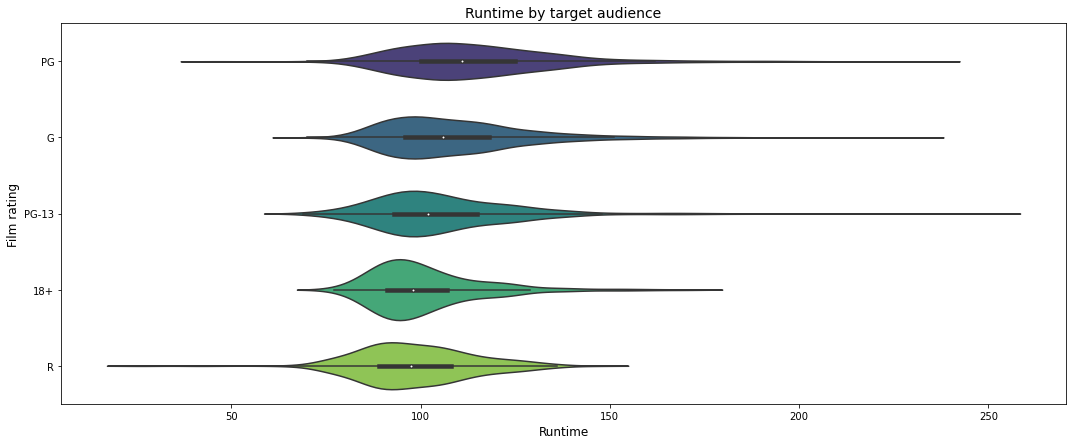

In [11]:
plt.subplots(figsize=(18,7))
ax2 = sns.violinplot(x='runtime', y="us_rating", data = movies, palette="viridis")
plt.ylabel("Film rating", size=12)
plt.xlabel("Runtime", size=12)
plt.title("Runtime by target audience", size=14)


-  ### Subtask 4.2: Revenue Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

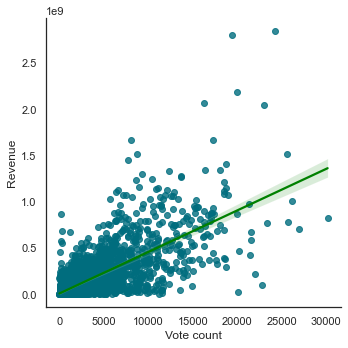

In [32]:
ax = sns.lmplot(data=movies, x='vote_count',y='revenue', scatter_kws={"color": "#006d7e"}, line_kws={"color": "green"})
ax.set(xlabel= "Vote count", ylabel = "Revenue")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

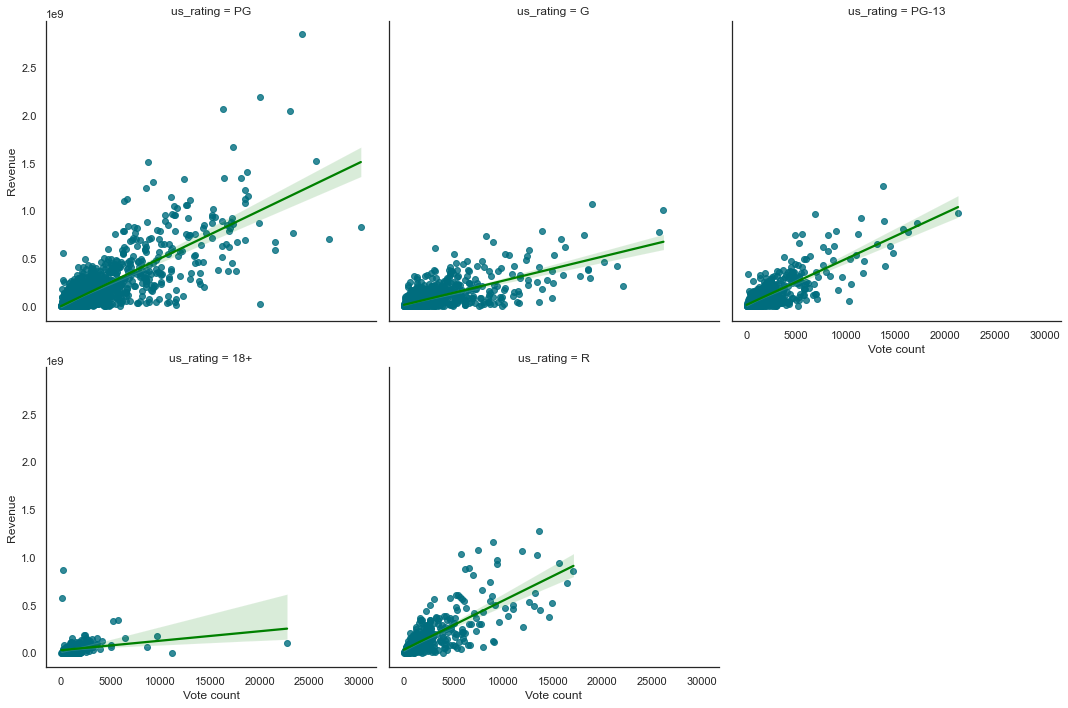

In [51]:
ax = sns.lmplot(data=movies, x='vote_count',y='revenue', col = "us_rating", col_wrap=3, scatter_kws={"color": "#006d7e"}, line_kws={"color": "green"})
ax.set(xlabel= "Vote count", ylabel = "Revenue")
plt.show

In [52]:
# revue vs budegt for genre = drama

df_viz_drama = movies[(movies['drama'] ==1) & (movies['vote_count'] > 5000)]
df_viz_drama = df_viz_drama[["original_title", "revenue", "budget"]].sort_values('revenue',ascending=False)[0:10]
df_viz_drama['revenue'] = df_viz_drama['revenue']/1000000
df_viz_drama['budget'] = df_viz_drama['budget']/1000000
df_viz_drama

,original_title,revenue,budget
277,Titanic,2187.463944,200.0
311,The Dark Knight Rises,1081.041287,250.0
178,Joker,1074.251311,55.0
148,Toy Story 4,1073.394593,175.0
591,The Dark Knight,1004.558444,185.0
875,The Jungle Book,966.550600,175.0
780,Bohemian Rhapsody,894.027543,52.0
55,Spider-Man: Homecoming,880.166924,175.0
421,Inside Out,857.611174,175.0
266,The Twilight Saga: Breaking Dawn - Part 2,829.000000,120.0


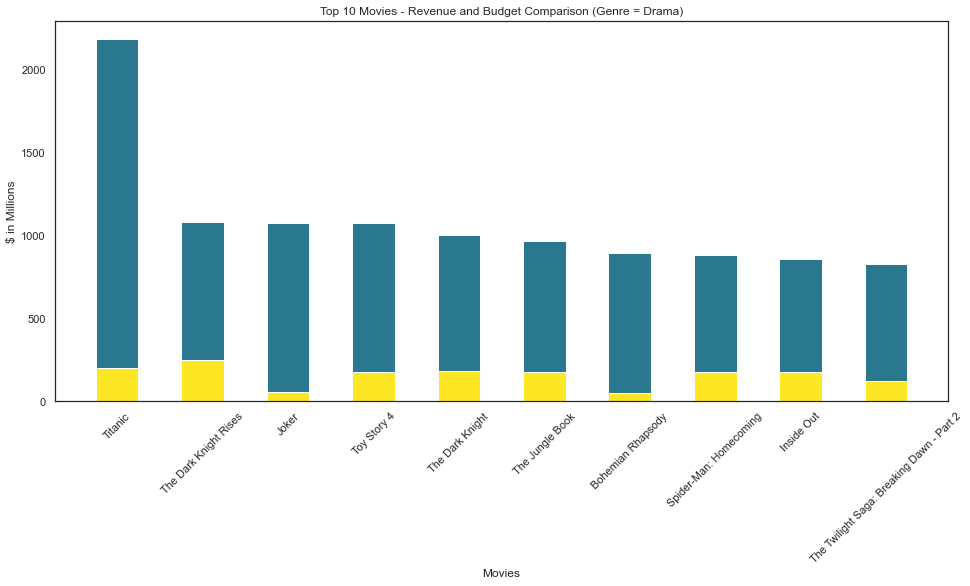

In [53]:
# plotting - rev vs budegt for genre = drama

plt.figure(figsize=(16,7)) # Make it 16x7 inch
plt.bar(df_viz_drama['original_title'], df_viz_drama['revenue'], width=0.5,color='#2A788EFF')
plt.bar(df_viz_drama['original_title'], df_viz_drama['budget'], color='#FDE725FF', width = 0.5)
plt.xticks(rotation=45)
plt.title('Top 10 Movies - Revenue and Budget Comparison (Genre = Drama)') 
plt.xlabel('Movies') 
plt.ylabel('$ in Millions')


plt.show()

In [54]:
# rev vs budegt for genre = comedy

df_viz_comedy = movies[(movies['comedy'] ==1) & (movies['vote_count'] > 5000)]
df_viz_comedy = df_viz_comedy[["original_title", "revenue", "budget"]].sort_values('revenue',ascending=False)[0:10]
df_viz_comedy['revenue'] = df_viz_comedy['revenue']/1000000
df_viz_comedy['budget'] = df_viz_comedy['budget']/1000000
df_viz_comedy

,original_title,revenue,budget
110,Frozen II,1450.026933,150.0
1240,Minions,1156.730962,74.0
148,Toy Story 4,1073.394593,175.0
326,Toy Story 3,1066.969703,200.0
602,Despicable Me 3,1031.552585,80.0
1178,Finding Dory,1028.570889,200.0
478,Zootopia,1023.784195,150.0
453,Despicable Me 2,970.761885,76.0
666,Jumanji: Welcome to the Jungle,962.102237,90.0
188,Shrek 2,928.760770,150.0


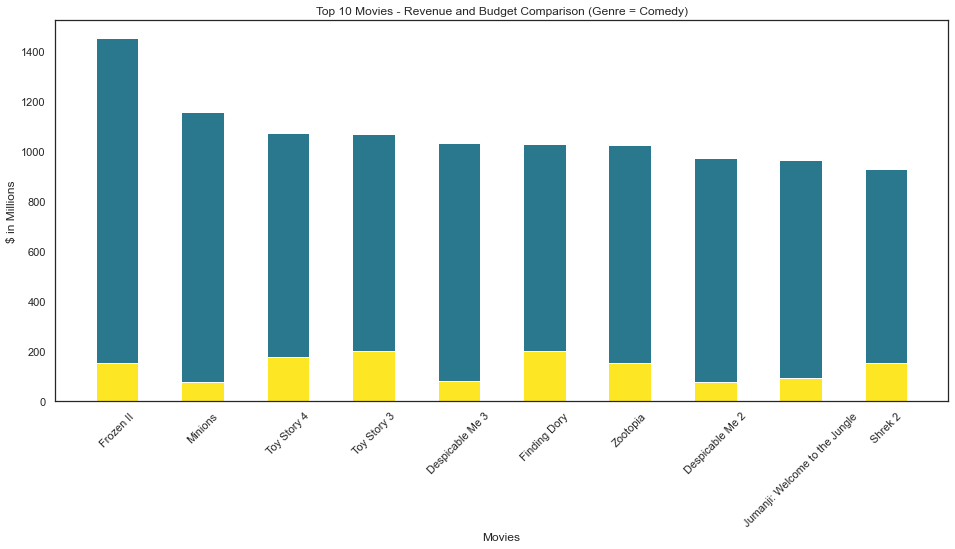

In [55]:
# plotting - rev vs budegt for genre = comedy

plt.figure(figsize=(16,7)) # Make it 16x7 inch
plt.bar(df_viz_comedy['original_title'], df_viz_comedy['revenue'], width=0.5,color='#2A788EFF')
plt.bar(df_viz_comedy['original_title'], df_viz_comedy['budget'], color='#FDE725FF', width = 0.5)
plt.xticks(rotation=45)
plt.title('Top 10 Movies - Revenue and Budget Comparison (Genre = Comedy)') 
plt.xlabel('Movies') 
plt.ylabel('$ in Millions')


plt.show()

In [56]:
# rev vs budegt for genre = thriller

df_viz_thriller = movies[(movies['thriller'] ==1) & (movies['vote_count'] > 5000)]
df_viz_thriller = df_viz_thriller[["original_title", "revenue", "budget"]].sort_values('revenue',ascending=False)[0:10]
df_viz_thriller['revenue'] = df_viz_thriller['revenue']/1000000
df_viz_thriller['budget'] = df_viz_thriller['budget']/1000000
df_viz_thriller

,original_title,revenue,budget
384,Jurassic World,1671.713208,150.0
344,Furious 7,1515.047671,190.0
196,The Fate of the Furious,1238.764765,250.0
303,Skyfall,1108.561013,200.0
311,The Dark Knight Rises,1081.041287,250.0
178,Joker,1074.251311,55.0
591,The Dark Knight,1004.558444,185.0
392,Spectre,880.674609,245.0
2065,The Da Vinci Code,767.820459,125.0
214,The Hunger Games: Mockingjay - Part 1,752.100229,125.0


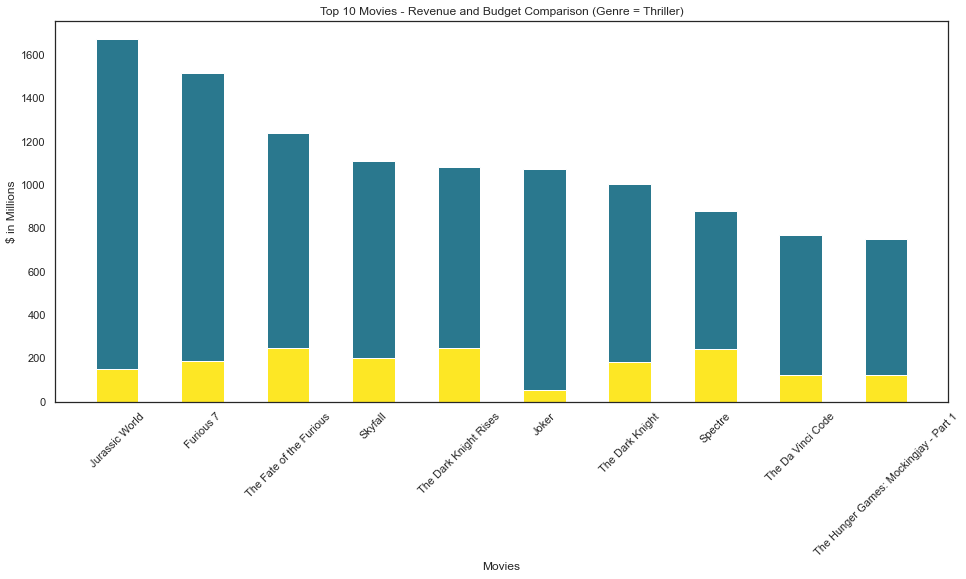

In [57]:
# plotting - rev vs budegt for genre = thriller

plt.figure(figsize=(16,7)) # Make it 16x7 inch
plt.bar(df_viz_thriller['original_title'], df_viz_thriller['revenue'], width=0.5,color='#2A788EFF')
plt.bar(df_viz_thriller['original_title'], df_viz_thriller['budget'], color='#FDE725FF', width = 0.5)
plt.xticks(rotation=45)
plt.title('Top 10 Movies - Revenue and Budget Comparison (Genre = Thriller)') 
plt.xlabel('Movies') 
plt.ylabel('$ in Millions')


plt.show()

In [58]:
# rev vs budegt for genre = action

df_viz_action = movies[(movies['action'] ==1) & (movies['vote_count'] > 5000)]
df_viz_action = df_viz_action[["original_title", "revenue", "budget"]].sort_values('revenue',ascending=False)[0:10]
df_viz_action['revenue'] = df_viz_action['revenue']/1000000
df_viz_action['budget'] = df_viz_action['budget']/1000000
df_viz_action

,original_title,revenue,budget
31,Avatar,2847.246203,237.0
75,Avengers: Endgame,2797.800564,356.0
620,Star Wars: The Force Awakens,2068.223624,245.0
40,Avengers: Infinity War,2046.239637,300.0
384,Jurassic World,1671.713208,150.0
78,The Avengers,1518.815515,220.0
344,Furious 7,1515.047671,190.0
120,Avengers: Age of Ultron,1405.403694,365.0
272,Black Panther,1346.739107,200.0
727,Star Wars: The Last Jedi,1332.539889,200.0


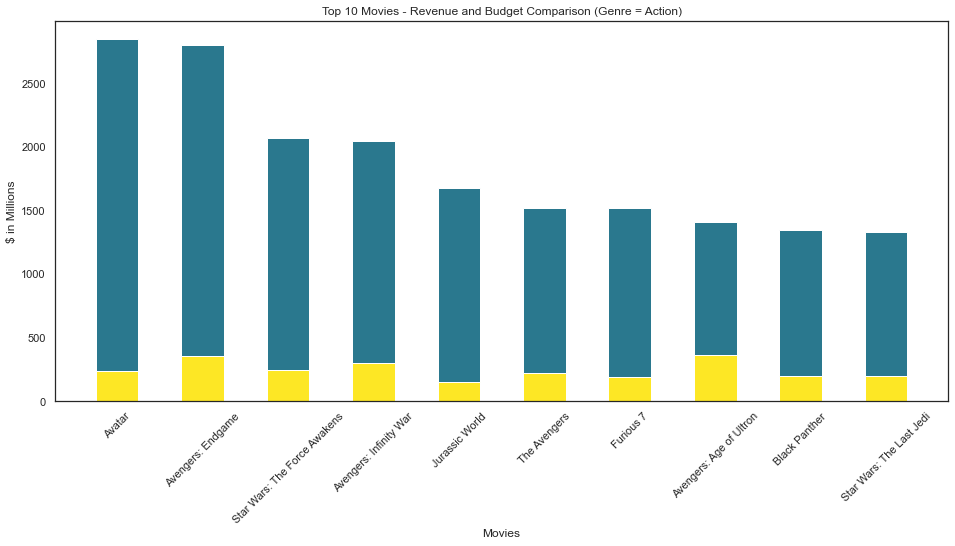

In [59]:
# plotting - rev vs budegt for genre = action

plt.figure(figsize=(16,7)) # Make it 16x7 inch
plt.bar(df_viz_action['original_title'], df_viz_action['revenue'], width=0.5,color='#2A788EFF')
plt.bar(df_viz_action['original_title'], df_viz_action['budget'], color='#FDE725FF', width = 0.5)
plt.xticks(rotation=45)
plt.title('Top 10 Movies - Revenue and Budget Comparison (Genre = Action)') 
plt.xlabel('Movies') 
plt.ylabel('$ in Millions')


plt.show()

In [60]:
# rev vs budegt for overall top 10 movies

df_viz = movies[["original_title", "revenue", "budget"]].sort_values('revenue',ascending=False)[0:10]
df_viz['revenue'] = df_viz['revenue']/1000000
df_viz['budget'] = df_viz['budget']/1000000
df_viz

,original_title,revenue,budget
31,Avatar,2847.246203,237.0
75,Avengers: Endgame,2797.800564,356.0
277,Titanic,2187.463944,200.0
620,Star Wars: The Force Awakens,2068.223624,245.0
40,Avengers: Infinity War,2046.239637,300.0
384,Jurassic World,1671.713208,150.0
317,The Lion King,1667.635327,260.0
78,The Avengers,1518.815515,220.0
344,Furious 7,1515.047671,190.0
110,Frozen II,1450.026933,150.0


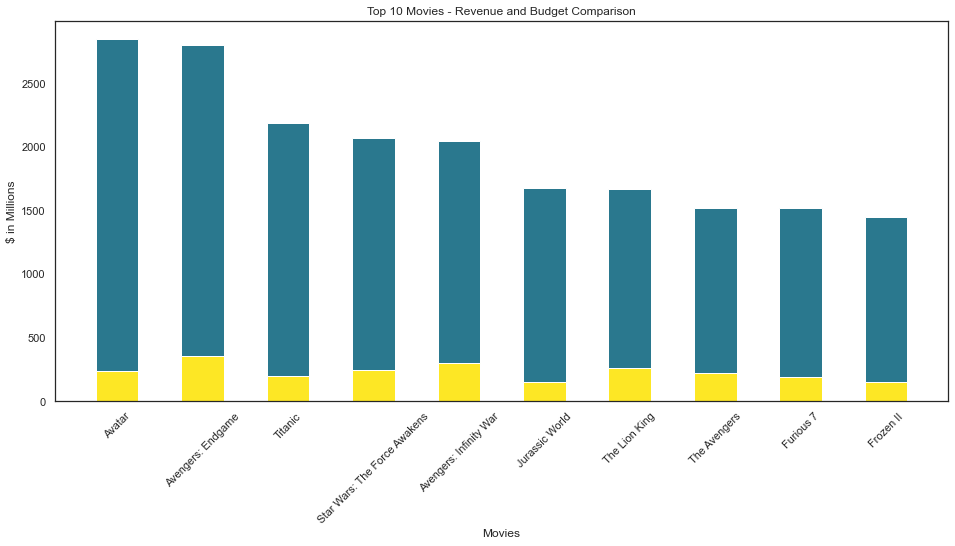

In [61]:
import seaborn as sns


plt.figure(figsize=(16,7)) # Make it 16x7 inch
plt.bar(df_viz['original_title'], df_viz['revenue'], width=0.5,color='#2A788EFF')
plt.bar(df_viz['original_title'], df_viz['budget'], color='#FDE725FF', width = 0.5)
plt.xticks(rotation=45)
plt.title('Top 10 Movies - Revenue and Budget Comparison') 
plt.xlabel('Movies') 
plt.ylabel('$ in Millions')


plt.show()


-  ### Subtask 4.3: Text Analysis
- #### Subtask 4.3.1 Sentiment Analysis

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [63]:
overview=movies[['overview']]
overview.head()

,overview
0,After finding a host body in investigative rep...
1,The Eternals are a team of ancient aliens who ...
2,"Paul Atreides, a brilliant and gifted young ma..."
3,A bank teller called Guy realizes he is a back...
4,In her turbulent life as a professional assass...


In [64]:
overview.dropna()

,overview
0,After finding a host body in investigative rep...
1,The Eternals are a team of ancient aliens who ...
2,"Paul Atreides, a brilliant and gifted young ma..."
3,A bank teller called Guy realizes he is a back...
4,In her turbulent life as a professional assass...
...,...
5339,A couple fights to hold their relationship tog...
5340,"In June 2013, Laura Poitras and reporter Glenn..."
5341,Painful memories arise when Kai Koss inherits ...
5342,"Truckers form a mile long ""convoy"" in support ..."


In [65]:
overview['polarity_score']=overview['overview'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
overview['neutral'] = overview['overview'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
overview['negative'] = overview['overview'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
overview['positive'] = overview['overview'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])

In [66]:
overview.head(7)

,overview,polarity_score,neutral,negative,positive
0,After finding a host body in investigative rep...,-0.8316,0.762,0.238,0.000
1,The Eternals are a team of ancient aliens who ...,-0.9038,0.777,0.223,0.000
2,"Paul Atreides, a brilliant and gifted young ma...",0.9313,0.651,0.098,0.251
3,A bank teller called Guy realizes he is a back...,0.4215,0.827,0.054,0.119
4,In her turbulent life as a professional assass...,0.1154,0.684,0.153,0.163
5,Investigative journalist Eddie Brock attempts ...,0.4678,0.636,0.165,0.198
6,"Minutes after Laurie Strode, her daughter Kare...",-0.5647,0.785,0.121,0.093


In [67]:
overview['sentiment']=''
overview.loc[overview.polarity_score>0.05,'sentiment']='Positive'
overview.loc[(overview.polarity_score>-0.05) & (overview.polarity_score<0.05),'sentiment']='Neutral'
overview.loc[overview.polarity_score<-0.05,'sentiment']='Negative'

In [68]:
overview.head()

,overview,polarity_score,neutral,negative,positive,sentiment
0,After finding a host body in investigative rep...,-0.8316,0.762,0.238,0.000,Negative
1,The Eternals are a team of ancient aliens who ...,-0.9038,0.777,0.223,0.000,Negative
2,"Paul Atreides, a brilliant and gifted young ma...",0.9313,0.651,0.098,0.251,Positive
3,A bank teller called Guy realizes he is a back...,0.4215,0.827,0.054,0.119,Positive
4,In her turbulent life as a professional assass...,0.1154,0.684,0.153,0.163,Positive


In [69]:
movies[['polarity_score', 'sentiment']]=overview[['polarity_score', 'sentiment']]

Text(0.5, 1.0, 'Sentiment Analysis of Movies Dataset')

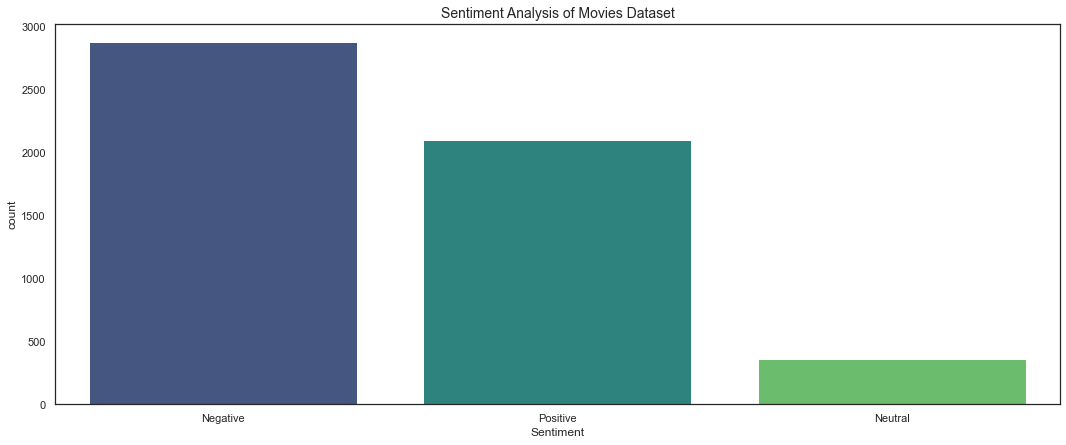

In [70]:
plt.subplots(figsize=(18,7))
sns.countplot(x='sentiment', data=movies, palette="viridis")
plt.ylabel("count", size=12)
plt.xlabel("Sentiment", size=12)
plt.title("Sentiment Analysis of Movies Dataset", size=14)

/Users/ghazalayobi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


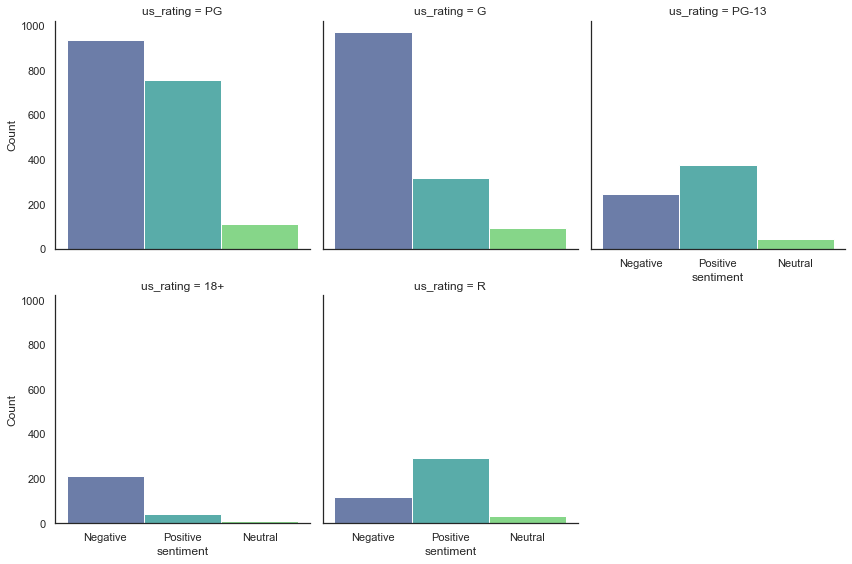

In [116]:

g = sns.FacetGrid(movies, col="us_rating", col_wrap=3, hue="sentiment", palette = "viridis", size=4, aspect=1)
g.map(sns.histplot, "sentiment")

<AxesSubplot:xlabel='sentiment', ylabel='count'>

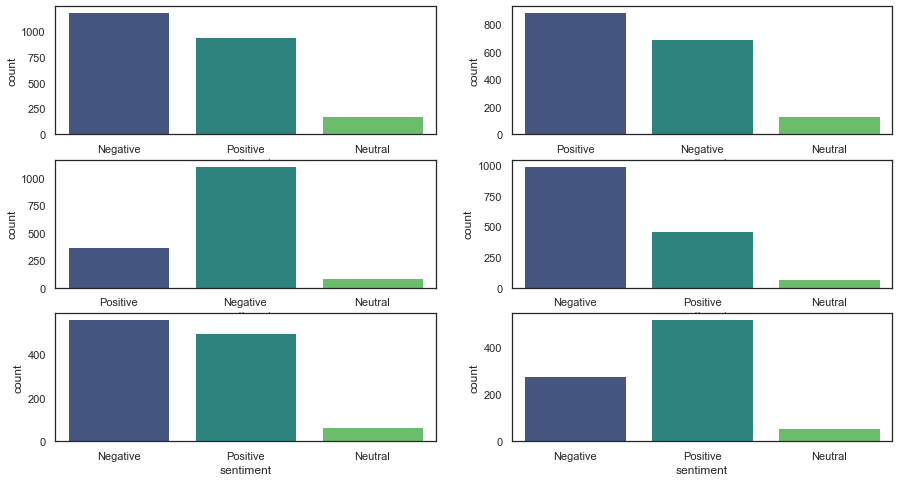

In [121]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


fig, ax = plt.subplots(3,2)
sns.countplot(data=movies[movies['drama']==1], x= 'sentiment', ax=ax[0,0], palette = "viridis")
sns.countplot(data=movies[movies['comedy']==1], x= 'sentiment', ax=ax[0,1], palette = "viridis")
sns.countplot(data=movies[movies['thriller']==1], x= 'sentiment', ax=ax[1,0], palette = "viridis")
sns.countplot(data=movies[movies['action']==1], x= 'sentiment', ax=ax[1,1], palette = "viridis")
sns.countplot(data=movies[movies['adventure']==1], x= 'sentiment', ax=ax[2,0], palette = "viridis")
sns.countplot(data=movies[movies['romance']==1], x= 'sentiment', ax=ax[2,1], palette = "viridis")

- #### Subtask 3.4.2 Clusters Analysis

ERROR: Could not find a version that satisfies the requirement sklearn.dataset.base (from versions: none)
ERROR: No matching distribution found for sklearn.dataset.base


In [143]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer


In [144]:
documents = movies['overview'].values.astype("U")

In [145]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [146]:
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [147]:
movies['cluster'] = model.labels_

movies.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,...,sci-fi,tv_movie,thriller,war,western,release_year,decade,polarity_score,sentiment,cluster
0,0,580489.0,English,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['ScienceFiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,...,1.0,0.0,0.0,0.0,0.0,2021,2020s,-0.8316,Negative,13
1,1,524434.0,English,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'ScienceFiction', 'Fan...",The Eternals are a team of ancient aliens who ...,...,1.0,0.0,0.0,0.0,0.0,2021,2020s,-0.9038,Negative,11
2,2,438631.0,English,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'ScienceFiction']","Paul Atreides, a brilliant and gifted young ma...",...,1.0,0.0,0.0,0.0,0.0,2021,2020s,0.9313,Positive,15
3,4,550988.0,English,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'ScienceFict...",A bank teller called Guy realizes he is a back...,...,1.0,0.0,0.0,0.0,0.0,2021,2020s,0.4215,Positive,1
4,5,574060.0,English,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347.0,"['Action', 'Thriller', 'Crime']",In her turbulent life as a professional assass...,...,0.0,0.0,1.0,0.0,0.0,2021,2020s,0.1154,Positive,19


In [151]:
movies['cluster'].value_counts().sort_values(ascending=False)

5     1244
1      458
6      421
12     341
4      274
2      228
10     227
19     205
16     203
14     202
8      191
18     186
3      177
13     177
15     171
9      165
11     141
0      139
17     111
7       83
Name: cluster, dtype: int64

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,...,sci-fi,tv_movie,thriller,war,western,release_year,decade,polarity_score,sentiment,cluster
66,153,15092.0,English,Crank: High Voltage,219.241,2009-04-16,6.0,2115.0,"['Action', 'Thriller', 'Crime']",Chelios faces a Chinese mobster who has stolen...,...,0.0,0.0,1.0,0.0,0.0,2009,2000s,0.3818,Positive,0
81,177,198663.0,English,The Maze Runner,204.576,2014-09-10,7.2,13987.0,"['Action', 'Mystery', 'ScienceFiction', 'Thril...","Set in a post-apocalyptic world, young Thomas ...",...,1.0,0.0,1.0,0.0,0.0,2014,2010s,-0.1280,Negative,0
114,234,372058.0,Japanese,君の名は。,154.252,2016-08-26,8.6,8013.0,"['Romance', 'Animation', 'Drama']",High schoolers Mitsuha and Taki are complete s...,...,0.0,0.0,0.0,0.0,0.0,2016,2010s,-0.5326,Negative,0
127,253,72331.0,English,Abraham Lincoln: Vampire Hunter,153.492,2012-06-20,5.7,2625.0,"['Action', 'Fantasy', 'Horror']",President Lincoln's mother is killed by a supe...,...,0.0,0.0,0.0,0.0,0.0,2012,2010s,-0.2500,Negative,0
198,365,863.0,English,Toy Story 2,125.459,1999-10-30,7.6,11000.0,"['Animation', 'Comedy', 'Family']","Andy heads off to Cowboy Camp, leaving his toy...",...,0.0,0.0,0.0,0.0,0.0,1999,1990s,0.9001,Positive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,9557,763.0,English,Braindead,10.063,1992-08-13,7.4,1135.0,"['Horror', 'Comedy']",When a Sumatran rat-monkey bites Lionel Cosgro...,...,0.0,0.0,0.0,0.0,0.0,1992,1990s,-0.6597,Negative,0
5226,9696,27352.0,English,Braddock: Missing in Action III,9.047,1988-01-22,5.7,172.0,"['Action', 'War']",When Colonel James Braddock is told that his A...,...,0.0,0.0,0.0,1.0,0.0,1988,1980s,0.5411,Positive,0
5243,9745,334522.0,English,Alone in Berlin,11.549,2016-02-15,6.7,303.0,"['War', 'Thriller', 'Drama']",Berlin in June of 1940. While Nazi propaganda ...,...,0.0,0.0,1.0,1.0,0.0,2016,2010s,-0.9751,Negative,0
5283,9841,9586.0,English,The Bonfire of the Vanities,9.280,1990-12-21,5.6,339.0,"['Crime', 'Comedy', 'Drama']","After his mistress runs over a black teen, a W...",...,0.0,0.0,0.0,0.0,0.0,1990,1990s,0.3182,Positive,0
